In [2]:
import mysql.connector
import polars as pl
from jinja2 import Template
import plotly.express as px


# Connect to your MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="bot_buster"
)



# find out suspicious commenter usernames

In [3]:
def get_data_from_db(sql_template, **kwargs):
    # Create a cursor object
    cursor = conn.cursor()

    with open(sql_template) as f:
        template = Template(f.read())
    sql = template.render(**kwargs)

    cursor.execute(sql)
    rows = cursor.fetchall()

    columns = [desc[0] for desc in cursor.description]
    cursor.close()

    return pl.DataFrame(rows, schema=columns)

In [3]:
start_date = '2023-10-31'
end_date = '2024-10-31'
interval_format='%Y-%m-%d %H:%i'
comments_minutely = get_data_from_db("queries/minutely_comments.sql", start_date=start_date, end_date=end_date, interval_format=interval_format)

/var/folders/39/qn9kr0c90bl3kg5v_2w7nm_00000gn/T/ipykernel_23297/840326410.py:15: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  return pl.DataFrame(rows, schema=columns)


In [4]:
comments_minutely.shape[0]

958199

In [4]:
# comments_minutely.write_ipc("comments_minutely.feather")
comments_minutely = pl.read_ipc("comments_minutely.feather")

In [6]:
fig  = px.scatter(
    comments_minutely.sort('number_comments_all_time', descending=False).with_columns(
        (pl.col('number_comments_all_time').cum_sum()/pl.col('number_comments_all_time').sum()).alias('cumshare')
    ).group_by('number_comments_all_time').agg(pl.col('cumshare').last())
    , x = 'number_comments_all_time', y = 'cumshare',
    width=800, height=400, title="Cumulative share of comments by number of posted comments")
fig.update_traces(marker=dict(size=4))
fig.show()

In [6]:
suspicious_commenters = comments_minutely.sort('max_CPP_this_CH', descending=True).filter(pl.col('max_CPP_this_CH') >= 10)
suspicious_commenters

username,user_id,channel_title,month,number_comments_all_time,number_periods_with_comments,max_CPP_this_CH,total_likes_all_time,total_replies_all_time,max_likes,max_replies,mean_likes_per_comment,mean_replies_per_comment,mean_likes_per_reply
str,i64,str,str,"decimal[38,0]",i64,"decimal[38,0]","decimal[38,0]","decimal[38,0]",i64,i64,"decimal[38,5]","decimal[38,5]","decimal[38,5]"
"""@KhanbabaKarimi""",2632379,"""Редакция""","""2024-02""",57,1,57,0,0,0,0,0.00000,0.00000,null
"""@sonysonyexperia2684""",3220330,"""В гостях у Гордона""","""2024-08""",55,1,55,0,0,0,0,0.00000,0.00000,null
"""@pnvik""",739238,"""Обманутый Россиянин""","""2024-01""",58,4,39,0,0,0,0,0.00000,0.00000,null
"""@sergeysoldatov6592""",2346783,"""УНІАН""","""2024-03""",72,4,39,7,1,1,1,0.09722,0.01389,7.00000
"""@someone3835""",134085,"""Майкл Наки""","""2024-01""",36,2,35,140,0,12,0,3.88889,0.00000,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""@OnilaKanen""",2992883,"""Максим Кац""","""2024-10""",12,3,10,0,0,0,0,0.00000,0.00000,null
"""@Vladimir-m2v6l""",3034905,"""Майкл Наки""","""2024-10""",252,88,10,64,20,4,6,0.25397,0.07937,3.20000
"""@Buhaem_s_Maksom""",70,"""Навальный LIVE""","""2024-10""",12,2,10,243,2,67,1,20.25000,0.16667,121.50000


In [19]:
# suspicious_commenters.group_by(['number_comments_all_time', 'number_periods_with_comments']).agg(
#     pl.len().alias('number_commenters')
# ).sort('number_periods_with_comments')
# fig  = px.scatter(
#     suspicious_commenters.filter(pl.col('number_comments_all_time') < 60)
#     , x = 'number_comments_all_time', y = 'number_periods_with_comments',
#     width=800, height=400, title="scatter plot of number of comments vs number of periods with comments")
# fig.update_traces(marker=dict(size=4))
# fig.show()

fig = px.density_heatmap(suspicious_commenters.group_by(['number_comments_all_time', 'number_periods_with_comments']).agg(
    pl.len().alias('number_commenters')
).sort('number_periods_with_comments').filter(pl.col('number_periods_with_comments') < 10), x="number_comments_all_time", y="number_periods_with_comments", z="number_commenters")
fig.show()

In [8]:
suspicious_commenters.select(
    pl.col('username').unique()
).write_csv("suspicious_commenters.csv")

# pull all the comments by the suspicious commenters

In [7]:
# only looking at the last month of comments as the whole year kills kernel on my laptop
start_date = '2024-10-01'
end_date = '2024-10-31'
interval_format='%Y-%m-%d %H:%i'
comments_suspicious = get_data_from_db(
    "queries/comments_by_commenter.sql"
    , start_date=start_date
    , end_date=end_date
    , user_ids = ','.join(map(str, suspicious_commenters.select(pl.col('user_id').unique()).to_numpy().flatten()))
)

/var/folders/39/qn9kr0c90bl3kg5v_2w7nm_00000gn/T/ipykernel_23440/840326410.py:15: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  return pl.DataFrame(rows, schema=columns)


In [8]:
comments_suspicious = comments_suspicious.sort('comment_id')

In [4]:
# comments_suspicious.write_ipc("comments_suspicious.feather")
comments_suspicious = pl.read_ipc("comments_suspicious.feather")

## apply embeddings to the comments

In [5]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from tqdm import tqdm


# Load model + tokenizer
model_name = "DeepPavlov/rubert-base-cased-sentence"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Input sentence(s)
sentences = comments_suspicious.sort('comment_id').select(pl.col('text')).to_numpy().flatten().tolist()


batch_size = 32
sentence_batches = [sentences[i:i+batch_size] for i in range(0, len(sentences), batch_size)]

all_embeddings = []

for batch in tqdm(sentence_batches):
    inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=128)

    with torch.no_grad():
        outputs = model(**inputs)
        token_embeddings = outputs.last_hidden_state

        attention_mask = inputs['attention_mask']
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size())
        sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
        sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
        batch_embeddings = sum_embeddings / sum_mask

        all_embeddings.append(batch_embeddings)

# Stack to get full tensor
suspicious_embeddings = torch.cat(all_embeddings, dim=0)
print(suspicious_embeddings.shape)

100%|██████████| 121/121 [01:59<00:00,  1.01it/s]

torch.Size([3867, 768])


In [10]:
from sklearn.decomposition import PCA

# Reduce from 768 to, say, 50 dimensions
pca = PCA(n_components=50)
reduced_embeddings = pca.fit_transform(suspicious_embeddings.numpy())

In [11]:
from sklearn.cluster import KMeans

n_clusters = 10  # You can tune this or use elbow method to find the best number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(reduced_embeddings)

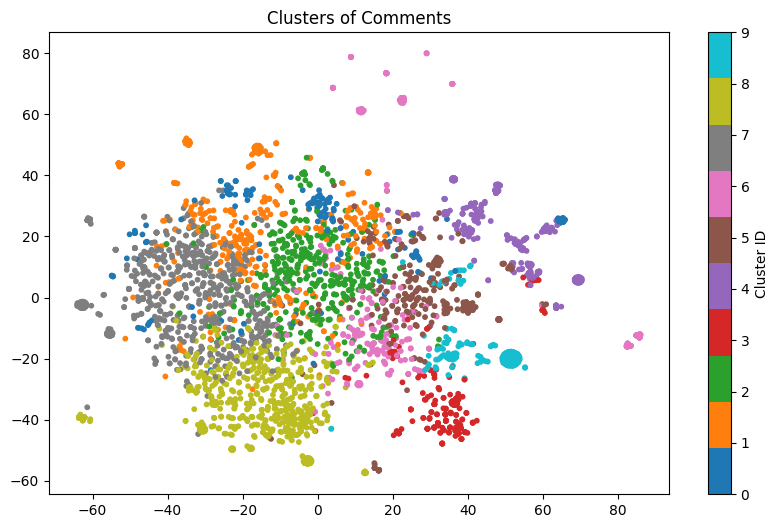

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30)
proj = tsne.fit_transform(reduced_embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(proj[:, 0], proj[:, 1], c=labels, cmap='tab10', s=10)
plt.title("Clusters of Comments")
plt.colorbar(label="Cluster ID")
plt.show()

## put labels of clusters back into comments database

In [13]:
# add column to comments_suspicious that contains label 
comments_suspicious = comments_suspicious.with_columns(
    pl.Series('cluster', labels)
)

In [19]:
cl = 9
comments_suspicious.filter(pl.col('cluster') == cl).select(pl.col('text')).to_numpy().flatten().tolist()

['Какой зритель, такой и юмор😂',
 'Российское государство очень легко возбуждается.',
 'Очень рада за Газпром! Назад товарищи!',
 'красавчик',
 'Thanks for your support!',
 'Молодец!!!! И Олю с Днем Рождения!!!!! Счастья , здоровья и Любви! 🥰🥰🥰',
 'Рвотные позывы, на протяжении всех новостей.  Это пи*дец',
 'доброго добра 😊 ⛅',
 'Какой мощный выпуск! Спасибо, Максим!',
 'Как же все похоже!',
 'Большой респект и очередной лайк..',
 'Что хорошо уши трут в этом эфире.',
 'прямой эфир всегда к месту 😊 ⛅\nдоброго 😄',
 'все чудесатее и чудесатее .. 😄 ⛅',
 '*Лилипутин* всех переиграл. Твёрдо и чётко. По плану',
 'Да уж, дичь просто!',
 '*Лилипутин* всех переиграл. Твёрдо и чётко. По плану',
 '*Лилипутин* всех переиграл. Твёрдо и чётко. По плану',
 '*Лилипутин* всех переиграл. Твёрдо и чётко. По плану',
 '*Лилипутин* всех переиграл. Твёрдо и чётко. По плану',
 '*Лилипутин* всех переиграл. Твёрдо и чётко. По плану',
 '*Лилипутин* всех переиграл. Твёрдо и чётко. По плану',
 '@@vodka362 Привет!',

In [20]:
cl = 6
comments_suspicious.filter(pl.col('cluster') == cl).select(pl.col('text')).to_numpy().flatten().tolist()

['деньги вкладчиков где?',
 'Сегодня опять ночью проснулась с тревогой, с мыслями об Алексее😢',
 'рамзы? или просто бот на зарплате?',
 'Хотел сказать, зло понемногу побеждает. :(',
 'Медаль херою-асвабадителю, борцуну с нато😂🎉',
 'Это прорыв, или рывок геоплешивого',
 'Опаньки. У геостратега плешивого не все по плану, оказывается',
 '"Я устал, я мухожук!"',
 'сколько словесного поноса',
 'кадырка как бедный родственник)',
 'Где репер васио с носком? Гойда',
 'Евреечка, какая блевотина😅😅😅😅',
 'Так смешно, когда вошки обсуждают других)))',
 'деньги вкладчиков где?',
 'деньги вкладчиков где?',
 'деньги вкладчиков где?',
 'деньги вкладчиков где?',
 'деньги вкладчиков где?',
 'деньги вкладчиков где?',
 'деньги вкладчиков где?',
 'деньги вкладчиков где?',
 'деньги вкладчиков где?',
 'И только время покажет-чья возьмет и кому придется потом истерить.\nСМЕЕТСЯ ПОСЛЕДНИЙ.',
 'Дехка́не — обозначение среднеазиатских крестьян. (с) Википедия',
 'А водкой кто торгует, гундяев.',
 'А ты муслик чего 

In [21]:
cl = 4
comments_suspicious.filter(pl.col('cluster') == cl).select(pl.col('text')).to_numpy().flatten().tolist()

['...боты, ДОСВИДУЛЬКИ ВАМ!!!🤣🤣🤣  ФБК, МОЛОДЦЫ!!!  ПОПАЛИ - "ЧЕТЫРЕХПАЛУБНЫЙ УБИТ"!!!',
 '...боты, ДОСВИДУЛЬКИ ВАМ!!!🤣🤣🤣  ФБК, МОЛОДЦЫ!!!  ПОПАЛИ - "ЧЕТЫРЕХПАЛУБНЫЙ УБИТ"!!!',
 '...боты, ДОСВИДУЛЬКИ ВАМ!!!🤣🤣🤣  ФБК, МОЛОДЦЫ!!!  ПОПАЛИ - "ЧЕТЫРЕХПАЛУБНЫЙ УБИТ"!!!',
 '...боты, ДОСВИДУЛЬКИ ВАМ!!!🤣🤣🤣  ФБК, МОЛОДЦЫ!!!  ПОПАЛИ - "ЧЕТЫРЕХПАЛУБНЫЙ УБИТ"!!!',
 '...боты, ДОСВИДУЛЬКИ ВАМ!!!🤣🤣🤣  ФБК, МОЛОДЦЫ!!!  ПОПАЛИ - "ЧЕТЫРЕХПАЛУБНЫЙ УБИТ"!!!',
 '...боты, ДОСВИДУЛЬКИ ВАМ!!!🤣🤣🤣  ФБК, МОЛОДЦЫ!!!  ПОПАЛИ - "ЧЕТЫРЕХПАЛУБНЫЙ УБИТ"!!!',
 '...боты, ДОСВИДУЛЬКИ ВАМ!!!🤣🤣🤣  ФБК, МОЛОДЦЫ!!!  ПОПАЛИ - "ЧЕТЫРЕХПАЛУБНЫЙ УБИТ"!!!',
 '...боты, ДОСВИДУЛЬКИ ВАМ!!!🤣🤣🤣  ФБК, МОЛОДЦЫ!!!  ПОПАЛИ - "ЧЕТЫРЕХПАЛУБНЫЙ УБИТ"!!!',
 '...боты, ДОСВИДУЛЬКИ ВАМ!!!🤣🤣🤣  ФБК, МОЛОДЦЫ!!!  ПОПАЛИ - "ЧЕТЫРЕХПАЛУБНЫЙ УБИТ"!!!',
 '...боты, ДОСВИДУЛЬКИ ВАМ!!!🤣🤣🤣  ФБК, МОЛОДЦЫ!!!  ПОПАЛИ - "ЧЕТЫРЕХПАЛУБНЫЙ УБИТ"!!!',
 'ЕСТЕСТВЕННО, КРЫМ - УКРАИНА!',
 '...боты, ДОСВИДУЛЬКИ ВАМ!!!🤣🤣🤣  ФБК, МОЛОДЦЫ!!!  ПОПАЛИ - "ЧЕТЫРЕХПАЛУБНЫЙ УБИТ"!!!',